In [19]:
import numpy as np
import h5py

import numpy as np
import torch
from pathlib import Path
import matplotlib.pyplot as plt

import astro_helper as ah
from GalDatasets import GalDataset
from train_flow import standarize_data

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import cm
from matplotlib import rc
plt.style.use('bmh')
cmap = mpl.colormaps['viridis']  # Example: 'viridis' colormap
rc('font',**{'family':'DejaVu Sans','sans-serif':['Helvetica']})

In [2]:
input_features = sorted([
    'weights', 'kappa',
    'midplane-dens', 'midplane-stellar-dens',
    'midplane-Pturb', 'midplane-Pth',
    'midplane-veldispz', 'midplane-veldisp3D'
])
log_features = [
    'weights', 'kappa',
    'midplane-dens', 'midplane-stellar-dens',
    'midplane-Pturb', 'midplane-Pth',
    'midplane-veldispz', 'midplane-veldisp3D',
    'midplane-SFR-dens'
]
output_features = ['midplane-SFR-dens']
galaxy_types = sorted(['MW', 'ETG-vlowmass', 'ETG-medmass'])

In [3]:
gals = GalDataset(
    input_features=input_features,
    output_features=output_features,
    galaxy_types=galaxy_types,
    snap_frac=0.2
)

In [4]:
print(gals.root_dir)

/n/holystore01/LABS/itc_lab/Lab/to-Carol


In [5]:
filenames = gals.get_filenames(galaxy_type='MW', feature="midplane-dens")
print(len(filenames))

61


In [6]:
idcs_usable_px = gals.get_idcs_usable_px('MW')
print(idcs_usable_px)

[  29019   33694   50810 ... 6418975 6418976 6442009]


In [7]:
print(gals.get_num_usable_px('MW'))
print(gals.get_num_usable_px('ETG-vlowmass'))
print(gals.get_num_usable_px('ETG-medmass'))

2015
24667
38200


In [8]:
print(gals.min_num_usable_px)

2015


In [9]:
input_features, output_features = gals[0]
print(len(input_features), len(output_features))

8 1


In [10]:
print(len(gals))

182


# show input/output properties of a random sample of snapshots, equally-sized for different galaxies, with pixels below the star formation cut-off removed

In [11]:
print(gals.min_num_usable_px)

2015


In [12]:
input_dict, output_dict = gals.get_data_as_1d()

In [13]:
print(input_dict)

{'kappa': tensor([1.0207e-14, 1.1978e-14, 1.2031e-14,  ..., 6.4894e-16, 6.2139e-16,
        1.4169e-15], dtype=torch.float64), 'midplane-Pth': tensor([ 13.7549,  23.7914,  15.0006,  ...,  23.1406,  32.5519, 129.2190],
       dtype=torch.float64), 'midplane-Pturb': tensor([  7265.9619,  16573.7088,  11405.4233,  ...,   3952.8707,
          2470.6356, 390936.0762], dtype=torch.float64), 'midplane-dens': tensor([0.1653, 0.2385, 0.2558,  ..., 0.0748, 0.0206, 0.2249],
       dtype=torch.float64), 'midplane-stellar-dens': tensor([2.0599, 2.7058, 2.7047,  ..., 0.0067, 0.0000, 0.0788],
       dtype=torch.float64), 'midplane-veldisp3D': tensor([ 455085.2972,  534718.5851,  582211.4360,  ...,  919063.2554,
         494499.3328, 1218286.0916], dtype=torch.float64), 'midplane-veldispz': tensor([ 299298.3946,  376354.1918,  301434.0565,  ...,  328153.4219,
         494945.5916, 1882380.4322], dtype=torch.float64), 'weights': tensor([2.5895e-11, 3.5043e-11, 2.1779e-11,  ..., 3.9602e-12, 7.8691e-12,


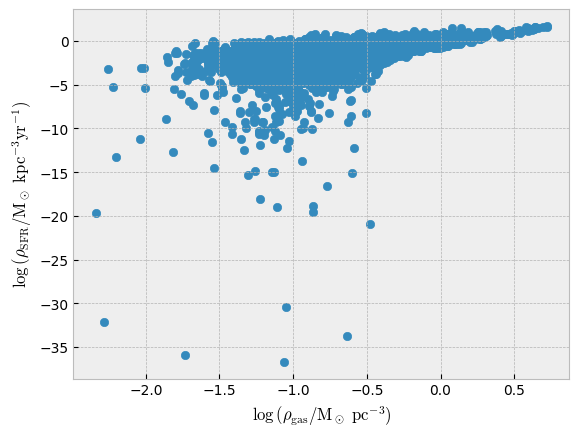

In [14]:
plt.scatter(np.log10(input_dict['midplane-dens']),
            np.log10(output_dict['midplane-SFR-dens']))
plt.xlabel(r'$\log{(\rho_{\rm gas}/{\rm M}_\odot~{\rm pc}^{-3})}$')
plt.ylabel(r'$\log{(\rho_{\rm SFR}/{\rm M}_\odot~{\rm kpc}^{-3}{\rm yr}^{-1})}$')
plt.show()

# check what the data looks like once standarized

In [20]:
X = np.stack([
    np.log10(feature) if key in log_features else feature for key, feature in input_dict.items()
], axis=1)
Y = np.stack([
    np.log10(feature) if key in log_features else feature for key, feature in output_dict.items()
], axis=1)

/tmp/ipykernel_206535/3025719563.py:2: RuntimeWarning: divide by zero encountered in log10
  np.log10(feature) if key in log_features else feature for key, feature in input_dict.items()


In [21]:
X, Y, norm_dict = standarize_data(X, Y)

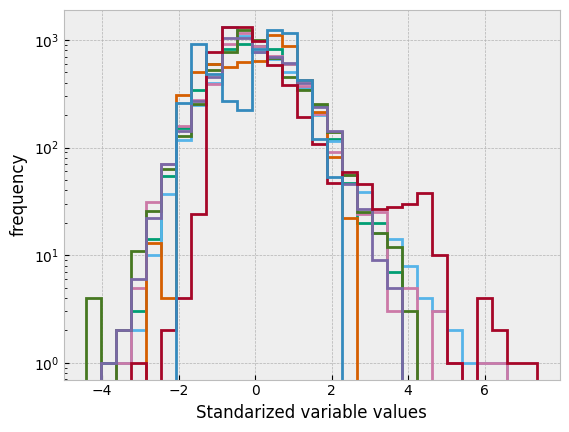

In [22]:
plt.hist(X, bins=30, histtype='step', lw=2, log=True)
plt.xlabel(r'Standarized variable values')
plt.ylabel(r'frequency')
plt.show()